## Importing Modules and Cleaning Data

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [44]:
np.random.seed(42)

### Read in CSV Files

In [45]:
train = ('./data/train.csv')
test = ('./data/test.csv')
train_df = pd.read_csv(train, index_col='Id')
test_df = pd.read_csv(test, index_col='Id')

In [46]:
test_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


### Remove Spaces and Capital Letters in Column Titles

I am removing the space and capital letters in the column titles to make them more pythonic.

In [47]:
train_df.columns = train_df.columns.map(lambda col: col.replace(' ','_').lower())

In [48]:
test_df.columns = test_df.columns.map(lambda col: col.replace(' ','_').lower())

### Drop Columns [PID, Unnamed]

I am dropping Id and PID because my datasets will be indexed by numbers and I don't want these columns considered as part of the numeric categories.  

In [49]:
train_df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [50]:
train_df.drop(['pid'], axis=1, inplace=True)

In [51]:
test_df.drop(['pid'], axis=1, inplace=True)

### Change Type for Columns

I converted MSSubClass and Yr Sold to objects. They both have the properties of categorical data with associated numnbers. 

In [52]:
train_df['ms_subclass'] = train_df['ms_subclass'].astype(object)
train_df['yr_sold'] = train_df['yr_sold'].astype(object)

In [53]:
test_df['ms_subclass'] = test_df['ms_subclass'].astype(object)
test_df['yr_sold'] = test_df['yr_sold'].astype(object)

### Null Values

First I will list all columns and their sum of null values

In [54]:
train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending=False)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_type        22
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_cars          1
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
total_bsmt_sf        1
dtype: int64

**Categorical Columns**

For these categorical columns with missing data 'NA' signified the absence of the particular item in the category.  I filled in these null values with 'None'.

In [55]:
categorical_null_cols = ['misc_feature', 'alley', 'fence',
 'fireplace_qu','garage_qual', 'garage_cond',
 'garage_finish','garage_type', 'bsmt_exposure',
 'bsmtfin_type_2', 'bsmt_cond', 'bsmt_qual',
 'bsmtfin_type_1', 'mas_vnr_type']

In [56]:
for col in train_df.columns:
    if col in categorical_null_cols:
        train_df[col].fillna(value = 'None', inplace=True)

In [57]:
for col in test_df.columns:
    if col in categorical_null_cols:
        test_df[col].fillna(value = 'None', inplace=True)

**Numeric Columns**

For these numeric columns with more discrete values I replaced the null values with 0.  

In [58]:
numeric_null_cols = ['bsmt_half_bath',
 'bsmt_full_bath','garage_cars']

In [59]:
for col in train_df.columns:
    if col in numeric_null_cols:
        train_df[col].fillna(value = 0, inplace=True)

In [60]:
for col in test_df.columns:
    if col in numeric_null_cols:
        test_df[col].fillna(value = 0, inplace=True)

In [61]:
numeric_median_cols = ['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1',
                       'bsmtfin_sf_2', 'bsmt_unf_sf', 'garage_area', 'total_bsmt_sf']

In [62]:
for col in train_df.columns:
    if col in numeric_median_cols:
        train_df[col].fillna(value = train_df[col].median(), inplace=True)

In [63]:
for col in test_df.columns:
    if col in numeric_median_cols:
        test_df[col].fillna(value = train_df[col].median(), inplace=True)

Since the distributions of these particualr numeric columns all have a right (positive) skew I have chosen to impute the null values with the median of each feature.

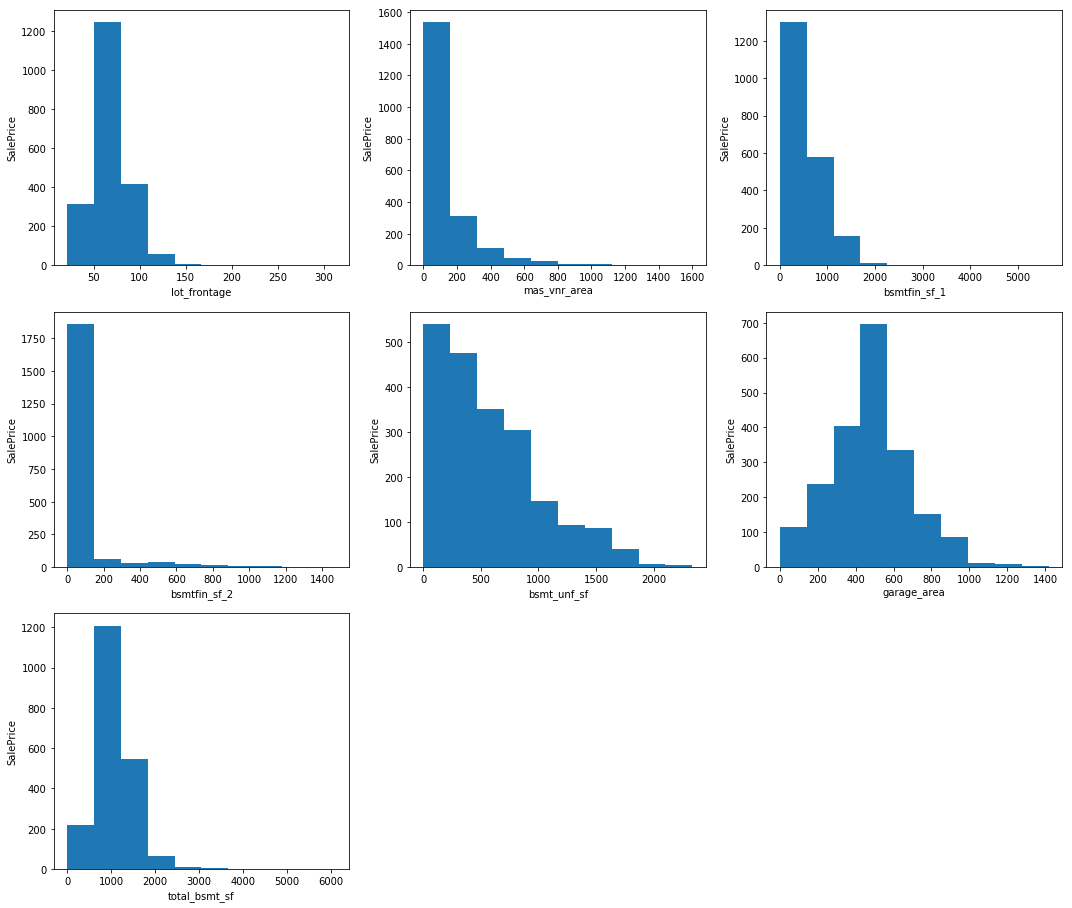

In [64]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_median_cols):
    fig.add_subplot(12,3,1+i)
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show();

**Garage Yr Blt**

1564 of the 1937 (80%) non null GarageYrBlt values match YearBuilt. From this rate of  eqiuivalence I am assuming that in most cases, YearBuilt will be an accurate value to fill these missing values with.

In [65]:
counter = 0
for x in train_df[train_df['garage_yr_blt'].notnull()][['garage_yr_blt','year_built']].values:
    if x[0] == x[1]:
        counter += 1
print(counter)

1564


In [66]:
train_df.loc[train_df['garage_yr_blt'].isnull(),
             'garage_yr_blt'] = train_df[train_df['garage_yr_blt'].isnull()]['year_built']

In [67]:
test_df.loc[test_df['garage_yr_blt'].isnull(),
             'garage_yr_blt'] = test_df[test_df['garage_yr_blt'].isnull()]['year_built']

**Pool QC**

2042 of the 2051 values in Pool QC are null so I will drop this column and Pool Area.

In [68]:
train_df.drop(['pool_qc'], axis=1, inplace=True)

In [69]:
test_df.drop(['pool_qc'], axis=1, inplace=True)

In [70]:
train_df.drop(['pool_area'], axis=1, inplace=True)

In [71]:
test_df.drop(['pool_area'], axis=1, inplace=True)

## Outliers

Two properties have a saleprice of $12,789 and `$`13,100, respectively, so I will drop these rows from the dataset.

In [72]:
train_df = train_df.drop(train_df.index[[1628,183]])

**Scatterplots to Identify other Outliers**

In [73]:
numeric_columns = train_df[train_df.select_dtypes(exclude = object).columns]

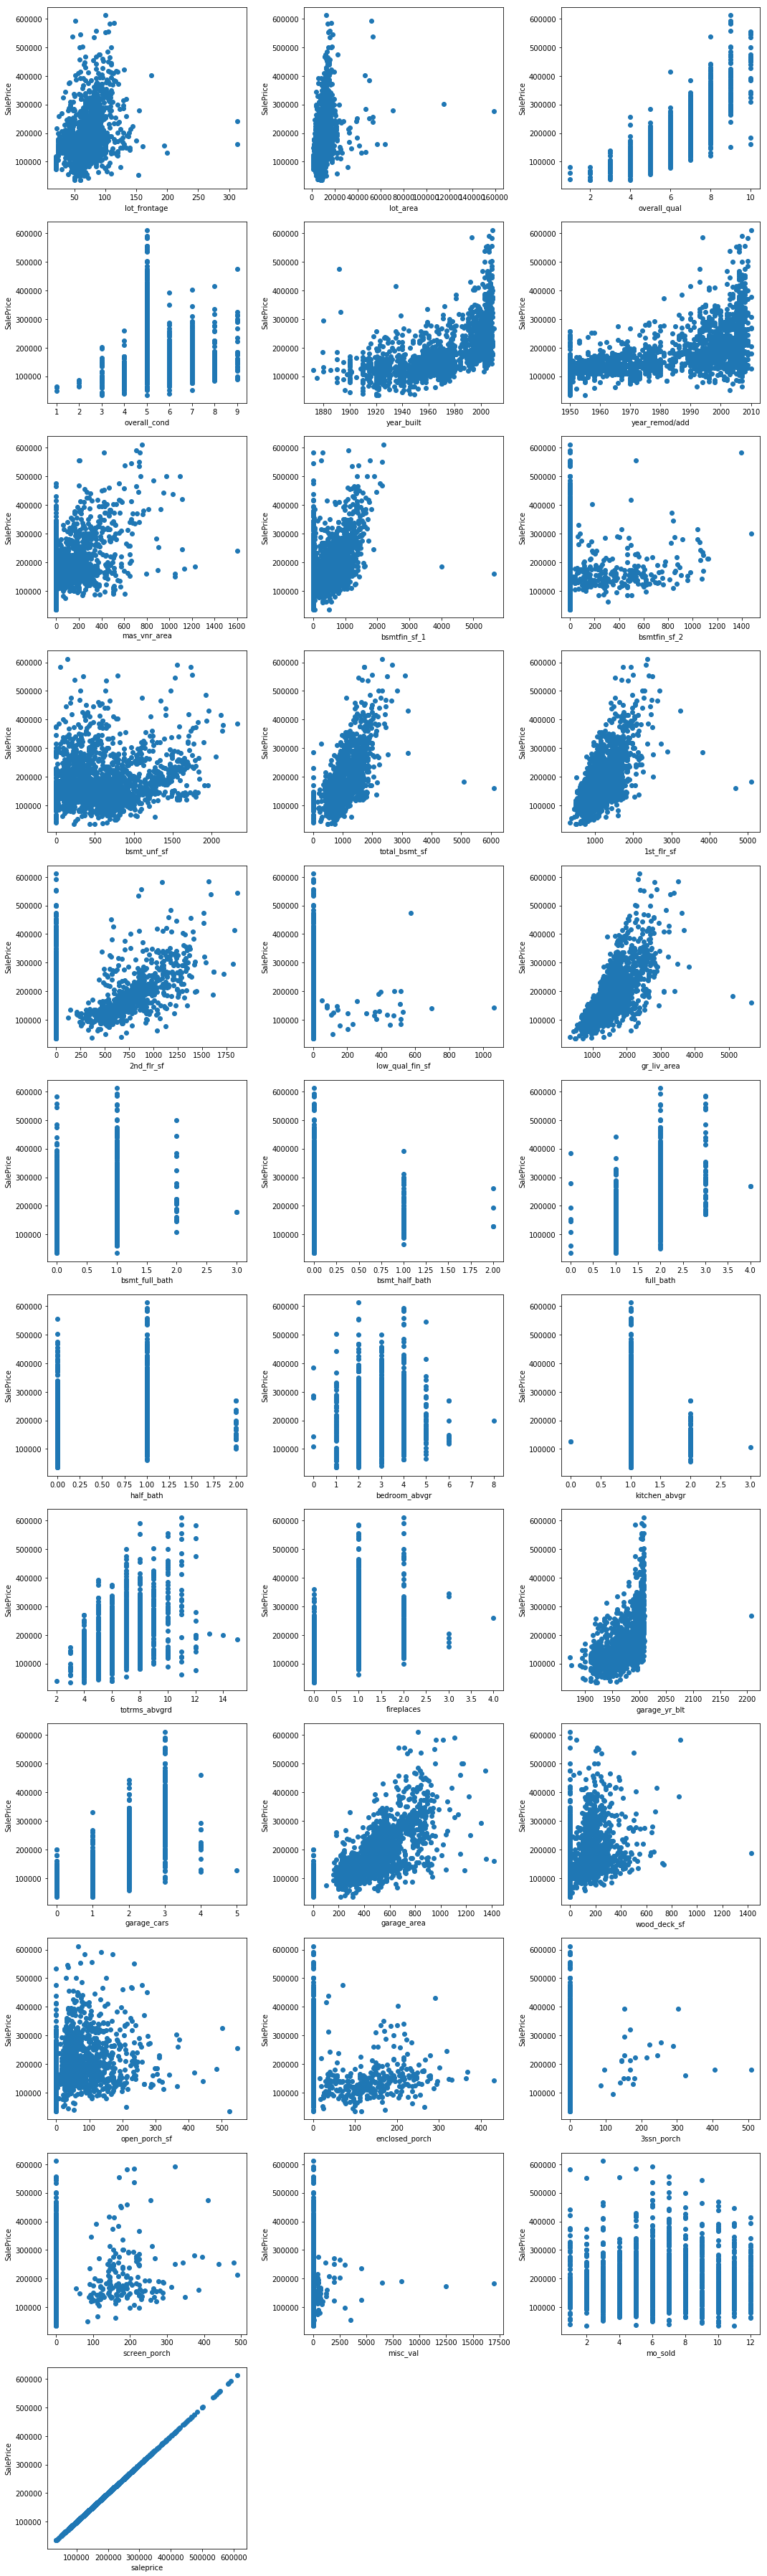

In [74]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_columns):
    fig.add_subplot(12,3,1+i)
    plt.scatter(train_df[col], train_df['saleprice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show();

In [75]:
train_df = train_df[train_df['lot_frontage'] < 300]

In [76]:
train_df = train_df[train_df['lot_area'] < 100000]

In [77]:
train_df = train_df[train_df['total_bsmt_sf'] < 5000]

In [78]:
train_df = train_df[train_df['gr_liv_area'] < 5000]

## Export the Cleaned Data

In [79]:
train_df.to_csv('./data/train_cleaned.csv')
test_df.to_csv('./data/test_cleaned.csv')

In [80]:
train_df.shape, test_df.shape

((2044, 77), (879, 76))